<div style="background-color: olive; padding: 10px; font-size: 60px; color: gold; text-align: center; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5); line-height: 1.2;">

  <strong style="font-size: 50px;"> Anomaly Detection Project </strong>

</div>

# Project Overview / Goal:    

This project aims to use data analysis techniques to detect anomalies, gain insights into curriculum access patterns, identify issues or irregularities, and provide recommendations to enhance data security, program integrity, and the educational experience. The analysis is valuable for data-driven decision-making and improving the educational platform's functionality and security.

In [1]:
# Import necessary libraries and modules
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Custom modules  
import acquire as a # for data acquisition
import prepare as p # for data preparation

# Data visualization libraries
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns  # For improved data visualization

import datetime  # Import the datetime module


# Plan

Initial Questions
 - What is the main objective of this project?
 - From where to obtain the data for this project?
 - What format is the data in, and what preprocessing steps are needed?
 - Are there any missing values or outliers that require attention?
 

# Acquire

 - The get_logs_cohort function acquires data from the db curriculum_logs

 - The dataset comprises of 900223 rows and 15 columns.

 - Each record within the dataset appears to document an instance of user access or interaction with Codeup curriculum.

| Column Name | Data Type | Definition                                      |
|-------------|-----------|-------------------------------------------------|
| date        | object    | Date when the access occurred.                  |
| time        | object    | Time of day when the access occurred.           |
| path        | object    | URL or path accessed by the user.               |
| user_id     | int64     | Unique identifier of the user.                 |
| cohort_id   | float64   | Identifier of the user's cohort.               |
| ip          | object    | IP address of the user's device.               |
| id          | float64   | Identifier associated with the cohort.         |
| name        | object    | Name or label of the cohort.                   |
| slack       | object    | Slack-related information for the cohort.     |
| start_date  | object    | Start date of the cohort.                      |
| end_date    | object    | End date of the cohort.                        |
| created_at  | object    | Date and time when the record was created.    |
| updated_at  | object    | Date and time when the record was updated.    |
| deleted_at  | object    | Indicates if the record has been deleted (null if not deleted). |
| program_id  | float64   | Identifier of the educational program associated with the cohort. |



In [2]:
df = a.get_logs_cohort()
df.head()

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [3]:
# print summary statistics
p.summarize(df)

Shape of Data: 
(900223, 15)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB
None
Missing Data Stats:
Missing Data Count by Column:
date               

# Prepare

In [3]:
df = p.prepare_logs_cohort(df)
df.head()

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id
datetime,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


# Explore

## Questions :

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [4]:
# Grouping the data by program
# Create dataframes for each program
wdphp = df[df.program_id == 1]
wdjava = df[df.program_id == 2]
datascience = df[df.program_id == 3]

In [5]:
# For each cohort in webdev show the top 10 pages visited
col = 'name'
for cohort in wdphp[col].unique():
    print(f'WebDev - PHP Cohort: {cohort}')
    print(wdphp[wdphp[col] == cohort].path.value_counts().head(10))
    print('======================\n======================')
print(df[df.program_id == 1].path.value_counts().head(20))

WebDev - PHP Cohort: Hampton
path
/                    210
java-iii              57
appendix              55
java-ii               46
java-i                46
spring                43
javascript-i          36
javascript-ii         31
mysql                 30
java-iii/servlets     30
Name: count, dtype: int64
WebDev - PHP Cohort: Arches
path
/                626
javascript-i     294
html-css         215
javascript-ii    204
spring           192
java-ii          167
java-iii         153
appendix         133
jquery           133
java-i           132
Name: count, dtype: int64
WebDev - PHP Cohort: Quincy
path
/                                                   151
content/laravel/intro                                38
content/html-css                                     33
content/laravel/intro/environment.html               31
content/laravel/intro/application-structure.html     20
content/php_iii                                      19
content/mysql/intro-to-mysql                        

In [6]:
# For each cohort in java show the top 10 pages visited
col = 'name'
for cohort in wdjava[col].unique():
    print(f'Java Cohort: {cohort}')
    print(wdjava[wdjava[col] == cohort].path.value_counts().head(10))
    print('======================\n======================')
print(df[df.program_id == 2].path.value_counts().head(20))

Java Cohort: Teddy
path
/                           1828
spring                       744
java-iii                     732
mysql                        638
javascript-i                 615
mkdocs/search_index.json     595
java-i                       522
jquery                       512
java-ii                      509
appendix                     505
Name: count, dtype: int64
Java Cohort: Sequoia
path
/                                         630
spring                                    364
spring/fundamentals/views                 207
javascript-i                              202
spring/fundamentals/controllers           190
spring/fundamentals/repositories          172
appendix                                  170
html-css                                  168
mkdocs/search_index.json                  168
spring/fundamentals/form-model-binding    156
Name: count, dtype: int64
Java Cohort: Niagara
path
spring           65
index.html       63
/                37
java-iii         29
my

path
/                            772
search/search_index.json     660
toc                          404
javascript-i                 374
java-iii                     324
spring                       311
java-ii                      268
html-css                     265
jquery                       262
javascript-i/introduction    256
Name: count, dtype: int64
Java Cohort: Jupiter
path
toc                         1866
/                           1696
search/search_index.json     998
javascript-i                 926
java-iii                     795
html-css                     784
java-ii                      755
spring                       621
mysql                        564
java-i                       503
Name: count, dtype: int64
Java Cohort: Kalypso
path
/                           939
javascript-i                631
html-css                    495
toc                         495
jquery                      470
search/search_index.json    467
java-iii                    456
javascr

In [7]:
# For each cohort in datascience show the top 10 pages visited
col = 'name'
for cohort in datascience[col].unique():
    print(f'Datascience Cohort: {cohort}')
    print(datascience[datascience[col] == cohort].path.value_counts().head(10))
    print('======================\n======================')
print(df[df.program_id == 3].path.value_counts().head(20))

Datascience Cohort: Bayes
path
/                                                    1967
1-fundamentals/modern-data-scientist.jpg              650
1-fundamentals/AI-ML-DL-timeline.jpg                  648
1-fundamentals/1.1-intro-to-data-science              640
search/search_index.json                              588
6-regression/1-overview                               521
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     387
10-anomaly-detection/1-overview                       384
6-regression/5.0-evaluate                             333
5-stats/3-probability-distributions                   320
Name: count, dtype: int64
Datascience Cohort: Curie
path
/                                                    1712
6-regression/1-overview                               595
search/search_index.json                              538
1-fundamentals/modern-data-scientist.jpg              467
1-fundamentals/AI-ML-DL-timeline.jpg                  465
1-fundamentals/1.1-intro-to-data-science  

 <div style="background-color: rgba(255, 0, 0, 0.5);">
      <strong style="font-size: 18px;"> 1. Take Away:-</strong>
    </div>

    
 The lesson that appears to attract the most traffic consistently across cohorts (per program):-

 - For the WebDev program :
      javascript-i/introduction/working-with-data-types-operators-and-variables     

 - For the Java program :
      javascript-i/introduction/working-with-data-types-operators-and-variables

 - For the datascience program :
      1-fundamentals/1.1-intro-to-data-science    

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


 ### For webdev

In [8]:
# For each cohort in webdev show the top 10 pages visited
col = 'name'
for cohort in wdphp[col].unique():
    print(f'WebDev - PHP Cohort: {cohort}')
    print(wdphp[wdphp[col] == cohort].path.value_counts().head(47))
    print('======================\n======================')
print(df[df.program_id == 1].path.value_counts().head(20))

WebDev - PHP Cohort: Hampton
path
/                                                                            210
java-iii                                                                      57
appendix                                                                      55
java-ii                                                                       46
java-i                                                                        46
spring                                                                        43
javascript-i                                                                  36
javascript-ii                                                                 31
mysql                                                                         30
java-iii/servlets                                                             30
java-iii/jsp-and-jstl                                                         27
jquery                                                                     

In [9]:
# Define the specific page we want to count
page_to_find = "javascript-i/introduction/working-with-data-types-operators-and-variables"

# Group the data by cohort within the "WebDev - PHP" program
grouped_by_cohort = wdphp.groupby('name')

# Initialize a counter to keep track of the total count
total_count = 0

# Iterate over unique cohorts and count the specified page visits
for cohort, cohort_df in grouped_by_cohort:
    page_count = cohort_df[cohort_df.path == page_to_find].shape[0]
    total_count += page_count
    print(f'Cohort: {cohort} - Page Visits: {page_count}')

# Print the total count across all cohorts
print(f'Total Visits for "{page_to_find}" in WebDev - PHP Program: {total_count}')


Cohort: Arches - Page Visits: 71
Cohort: Badlands - Page Visits: 0
Cohort: Denali - Page Visits: 0
Cohort: Everglades - Page Visits: 0
Cohort: Franklin - Page Visits: 0
Cohort: Glacier - Page Visits: 24
Cohort: Hampton - Page Visits: 9
Cohort: Ike - Page Visits: 1
Cohort: Joshua - Page Visits: 0
Cohort: Kings - Page Visits: 4
Cohort: Lassen - Page Visits: 57
Cohort: Olympic - Page Visits: 65
Cohort: Quincy - Page Visits: 1
Total Visits for "javascript-i/introduction/working-with-data-types-operators-and-variables" in WebDev - PHP Program: 232


 ### For Java

In [10]:
# Define the specific page we want to count
page_to_find = "javascript-i/introduction/working-with-data-types-operators-and-variables"

# Group the data by cohort within the "Java" program
grouped_by_cohort = wdjava.groupby('name')

# Initialize a counter to keep track of the total count
total_count = 0

# Iterate over unique cohorts and count the specified page visits
for cohort, cohort_df in grouped_by_cohort:
    page_count = cohort_df[cohort_df.path == page_to_find].shape[0]
    total_count += page_count
    print(f'Cohort: {cohort} - Page Visits: {page_count}')

# Print the total count across all cohorts
print(f'Total Visits for "{page_to_find}" in WebDev - PHP Program: {total_count}')


Cohort: Andromeda - Page Visits: 294
Cohort: Apex - Page Visits: 270
Cohort: Bash - Page Visits: 173
Cohort: Betelgeuse - Page Visits: 327
Cohort: Ceres - Page Visits: 423
Cohort: Deimos - Page Visits: 292
Cohort: Europa - Page Visits: 319
Cohort: Fortuna - Page Visits: 295
Cohort: Ganymede - Page Visits: 257
Cohort: Hyperion - Page Visits: 382
Cohort: Jupiter - Page Visits: 362
Cohort: Kalypso - Page Visits: 237
Cohort: Luna - Page Visits: 315
Cohort: Mammoth - Page Visits: 0
Cohort: Marco - Page Visits: 505
Cohort: Neptune - Page Visits: 329
Cohort: Niagara - Page Visits: 1
Cohort: Oberon - Page Visits: 146
Cohort: Pinnacles - Page Visits: 11
Cohort: Sequoia - Page Visits: 36
Cohort: Staff - Page Visits: 285
Cohort: Teddy - Page Visits: 176
Cohort: Ulysses - Page Visits: 276
Cohort: Voyageurs - Page Visits: 330
Cohort: Wrangell - Page Visits: 283
Cohort: Xanadu - Page Visits: 241
Cohort: Yosemite - Page Visits: 173
Cohort: Zion - Page Visits: 356
Total Visits for "javascript-i/introd

### For datascience

In [11]:
# Define the specific page we want to count
page_to_find = "1-fundamentals/1.1-intro-to-data-science"

# Group the data by cohort within the "Java" program
grouped_by_cohort = datascience.groupby('name')

# Initialize a counter to keep track of the total count
total_count = 0

# Iterate over unique cohorts and count the specified page visits
for cohort, cohort_df in grouped_by_cohort:
    page_count = cohort_df[cohort_df.path == page_to_find].shape[0]
    total_count += page_count
    print(f'Cohort: {cohort} - Page Visits: {page_count}')

# Print the total count across all cohorts
print(f'Total Visits for "{page_to_find}" in WebDev - PHP Program: {total_count}')


Cohort: Bayes - Page Visits: 640
Cohort: Curie - Page Visits: 461
Cohort: Darden - Page Visits: 460
Cohort: Easley - Page Visits: 8
Cohort: Florence - Page Visits: 64
Total Visits for "1-fundamentals/1.1-intro-to-data-science" in WebDev - PHP Program: 1633


<div style="background-color: rgba(255, 0, 0, 0.5);">
      <strong style="font-size: 18px;">  2. Take Away:-</strong>
 </div>

Cohort that referred to a lesson significantly more than other cohorts seemed to gloss over

- For the WebDev program :
      Cohort: Arches visited the page(javascript-i/introduction/working-with-data-types-operators-and-variables) 71 times

 - For the Java program :
       Cohort: Andromeda visited the page (javascript-i/introduction/working-with-data-types-operators-and-variables) 294 times

 - For the datascience program :
       Cohort: Bayes visited the page (1-fundamentals/1.1-intro-to-data-science  ) 640 times
        


# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


In [12]:
# Define the page views threshold for "hardly access" (less than 10 page views)
page_views_threshold = 10

# Filter the DataFrame for students who are active
active_students = df[(df.index >= df['start_date']) & (df.index <= df['end_date'])]

# Calculate the number of page views for each active student
page_views_counts = active_students['user_id'].value_counts()

# Identify students who hardly access the curriculum
hardly_active_students = page_views_counts[page_views_counts < page_views_threshold]

# Print information about hardly active students
for user_id in hardly_active_students.index:
    student_data = active_students[active_students['user_id'] == user_id]
    print(f"User ID: {user_id}")
    print(f"Cohort ID: {student_data['cohort_id'].iloc[0]}")
    print(f"Cohort Name: {student_data['name'].iloc[0]}")
    print(f"Program ID: {student_data['program_id'].iloc[0]}")
    print(f"Date Time: {student_data.index[0]}")  # Print the index (datetime)
    print(f"Start Date: {student_data['start_date'].iloc[0]}")
    print(f"End Date: {student_data['end_date'].iloc[0]}")
    print(f"Number of Page Views: {page_views_counts[user_id]}")
    print("======================\n======================")


User ID: 388
Cohort ID: 31.0
Cohort Name: Andromeda
Program ID: 2.0
Date Time: 2019-03-19 09:50:19
Start Date: 2019-03-18
End Date: 2019-07-30
Number of Page Views: 8
User ID: 812
Cohort ID: 58.0
Cohort Name: Hyperion
Program ID: 2.0
Date Time: 2020-11-08 01:45:34
Start Date: 2020-05-26
End Date: 2020-11-10
Number of Page Views: 7
User ID: 956
Cohort ID: 139.0
Cohort Name: Oberon
Program ID: 2.0
Date Time: 2021-04-12 16:44:18
Start Date: 2021-04-12
End Date: 2021-10-01
Number of Page Views: 6
User ID: 539
Cohort ID: 52.0
Cohort Name: Europa
Program ID: 2.0
Date Time: 2019-11-04 16:19:26
Start Date: 2019-11-04
End Date: 2020-04-17
Number of Page Views: 5
User ID: 278
Cohort ID: 24.0
Cohort Name: Voyageurs
Program ID: 2.0
Date Time: 2018-09-27 13:57:44
Start Date: 2018-05-29
End Date: 2018-10-11
Number of Page Views: 4
User ID: 832
Cohort ID: 62.0
Cohort Name: Jupiter
Program ID: 2.0
Date Time: 2020-12-07 14:22:00
Start Date: 2020-09-21
End Date: 2021-03-30
Number of Page Views: 3
User I

In [ ]:
# Define the page views threshold for "hardly access" (less than 10 page views)
page_views_threshold = 10

# Filter the DataFrame for students who are active
active_students = df[(df.index >= df['start_date']) & (df.index <= df['end_date'])]

# Calculate the number of page views for each active student
page_views_counts = active_students['user_id'].value_counts()

# Identify students who hardly access the curriculum
hardly_active_students = page_views_counts[page_views_counts < page_views_threshold]

# Print information about hardly active students
for user_id in hardly_active_students.index:
    student_data = active_students[active_students['user_id'] == user_id]
    print(f"User ID: {user_id}")
    print(f"Cohort ID: {student_data['cohort_id'].iloc[0]}")
    print(f"Cohort Name: {student_data['name'].iloc[0]}")
    print(f"Program ID: {student_data['program_id'].iloc[0]}")
    print(f"Date Time: {student_data.index[0]}")  # Print the index (datetime)
    print(f"Start Date: {student_data['start_date'].iloc[0]}")
    print(f"End Date: {student_data['end_date'].iloc[0]}")
    print(f"Number of Page Views: {page_views_counts[user_id]}")
    print("======================\n======================")


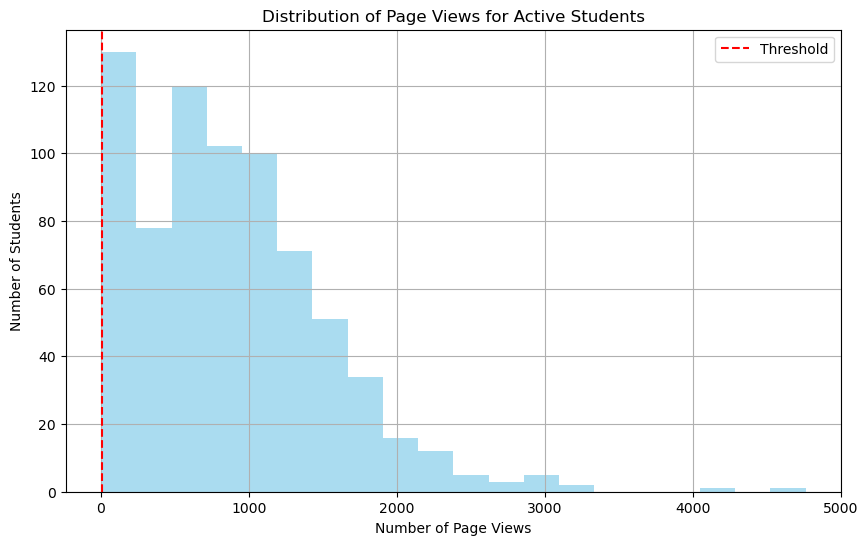

In [37]:
# Create a histogram of page views
plt.figure(figsize=(10, 6))
plt.hist(page_views_counts, bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Page Views for Active Students')
plt.xlabel('Number of Page Views')
plt.ylabel('Number of Students')
plt.axvline(page_views_threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.grid()
plt.show()


<div style="background-color: rgba(255, 0, 0, 0.5);">
      <strong style="font-size: 18px;">  3. Take Away:-</strong>
 </div>
​
There are students who, when active, hardly accessed the curriculum, less than 10 page views. They are all from Java program. 
 - Information on those students:-
 
    - Ganymede cohorts, Cohort ID: 57.0 

    - Neptune cohorts, Cohort ID: 138.0 

    - Marco  cohorts, Cohort ID: 135.0
​
​

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


In [18]:
# Define the time range for suspicious activity 
suspicious_start_time = '00:00:00'  # Midnight (12 am)
suspicious_end_time = '03:00:00'  # 3 am

# Extract the time from the 'datetime' index
df['time'] = df.index.time

# Filter the data for access during the suspicious time range
suspicious_time_data = df[(df['time'] >= pd.to_datetime(suspicious_start_time).time()) |
                          (df['time'] <= pd.to_datetime(suspicious_end_time).time())]

# Define a threshold for high-frequency access
high_frequency_threshold = 500

# Group the data by IP address and count the number of page views
ip_page_views_counts = suspicious_time_data['ip'].value_counts()

# Identify suspicious IP addresses
suspicious_ips = ip_page_views_counts[ip_page_views_counts > high_frequency_threshold].index

# Print information about suspicious activity, including cohort ID
for ip in suspicious_ips:
    print(f"Suspicious IP Address: {ip}")
    print(f"Total Page Views during Suspicious Time: {ip_page_views_counts[ip]}")
    
    # Get the cohort IDs associated with the suspicious IP address
    cohort_ids = suspicious_time_data[suspicious_time_data['ip'] == ip]['cohort_id'].unique()
    
    print(f"Cohort IDs for Suspicious Activity: {cohort_ids}")
    
    print("======================\n======================")


Suspicious IP Address: 97.105.19.58
Total Page Views during Suspicious Time: 284579
Cohort IDs for Suspicious Activity: [ 1. 14. 24. 23. 22.  8. 18. 16. 21. 25. 26. nan  7. 27. 17. 28. 15. 29.
 31. 32. 19. 33. 34. 51. 52. 53. 55. 57.]
Suspicious IP Address: 97.105.19.61
Total Page Views during Suspicious Time: 61662
Cohort IDs for Suspicious Activity: [ 8. 22. 21.  1. 18. 16. nan 14. 19. 23. 13. 24.]
Suspicious IP Address: 192.171.117.210
Total Page Views during Suspicious Time: 9515
Cohort IDs for Suspicious Activity: [ 19.  14.  18.  22.  21.  nan   1.  13.  23.   2.  17.  15.  24.  25.
  16.  26.   7.  11.  27.  29.  28.  31.  32.  33.  34.  51.  52.  53.
  55.  59. 138. 133.]
Suspicious IP Address: 71.150.217.33
Total Page Views during Suspicious Time: 6791
Cohort IDs for Suspicious Activity: [28.]
Suspicious IP Address: 76.185.145.231
Total Page Views during Suspicious Time: 4754
Cohort IDs for Suspicious Activity: [28.]
Suspicious IP Address: 12.106.208.194
Total Page Views durin

Cohort IDs for Suspicious Activity: [62.]
Suspicious IP Address: 70.94.165.107
Total Page Views during Suspicious Time: 1715
Cohort IDs for Suspicious Activity: [nan]
Suspicious IP Address: 72.181.98.75
Total Page Views during Suspicious Time: 1689
Cohort IDs for Suspicious Activity: [32. 17.]
Suspicious IP Address: 172.125.226.175
Total Page Views during Suspicious Time: 1682
Cohort IDs for Suspicious Activity: [62.]
Suspicious IP Address: 66.25.163.122
Total Page Views during Suspicious Time: 1673
Cohort IDs for Suspicious Activity: [57. nan]
Suspicious IP Address: 136.50.74.48
Total Page Views during Suspicious Time: 1671
Cohort IDs for Suspicious Activity: [57.]
Suspicious IP Address: 66.69.86.155
Total Page Views during Suspicious Time: 1637
Cohort IDs for Suspicious Activity: [26. 28.]
Suspicious IP Address: 104.190.242.242
Total Page Views during Suspicious Time: 1631
Cohort IDs for Suspicious Activity: [22.]
Suspicious IP Address: 75.58.161.186
Total Page Views during Suspiciou

Cohort IDs for Suspicious Activity: [58.]
Suspicious IP Address: 130.45.76.131
Total Page Views during Suspicious Time: 1238
Cohort IDs for Suspicious Activity: [132.]
Suspicious IP Address: 107.128.2.166
Total Page Views during Suspicious Time: 1230
Cohort IDs for Suspicious Activity: [58.]
Suspicious IP Address: 136.50.17.203
Total Page Views during Suspicious Time: 1216
Cohort IDs for Suspicious Activity: [57.]
Suspicious IP Address: 67.11.56.110
Total Page Views during Suspicious Time: 1207
Cohort IDs for Suspicious Activity: [58.]
Suspicious IP Address: 68.201.233.142
Total Page Views during Suspicious Time: 1201
Cohort IDs for Suspicious Activity: [134.]
Suspicious IP Address: 66.69.108.117
Total Page Views during Suspicious Time: 1199
Cohort IDs for Suspicious Activity: [29.]
Suspicious IP Address: 76.183.231.195
Total Page Views during Suspicious Time: 1185
Cohort IDs for Suspicious Activity: [61.]
Suspicious IP Address: 72.181.108.107
Total Page Views during Suspicious Time: 1

Cohort IDs for Suspicious Activity: [16. 21.  1. 17. 24. 23. 22. 28. nan 25. 27. 26. 29. 31. 33.]
Suspicious IP Address: 66.69.40.223
Total Page Views during Suspicious Time: 989
Cohort IDs for Suspicious Activity: [28.]
Suspicious IP Address: 70.94.150.75
Total Page Views during Suspicious Time: 987
Cohort IDs for Suspicious Activity: [33.]
Suspicious IP Address: 69.58.156.212
Total Page Views during Suspicious Time: 984
Cohort IDs for Suspicious Activity: [62.]
Suspicious IP Address: 50.30.92.22
Total Page Views during Suspicious Time: 974
Cohort IDs for Suspicious Activity: [58.]
Suspicious IP Address: 173.173.109.5
Total Page Views during Suspicious Time: 974
Cohort IDs for Suspicious Activity: [133.]
Suspicious IP Address: 70.123.203.131
Total Page Views during Suspicious Time: 966
Cohort IDs for Suspicious Activity: [nan 24. 23. 26. 29. 32. 33.]
Suspicious IP Address: 136.50.11.90
Total Page Views during Suspicious Time: 961
Cohort IDs for Suspicious Activity: [nan]
Suspicious IP

Cohort IDs for Suspicious Activity: [26.]
Suspicious IP Address: 73.34.158.193
Total Page Views during Suspicious Time: 773
Cohort IDs for Suspicious Activity: [58.]
Suspicious IP Address: 76.250.151.105
Total Page Views during Suspicious Time: 771
Cohort IDs for Suspicious Activity: [135.]
Suspicious IP Address: 47.184.206.205
Total Page Views during Suspicious Time: 770
Cohort IDs for Suspicious Activity: [61.]
Suspicious IP Address: 172.9.1.31
Total Page Views during Suspicious Time: 770
Cohort IDs for Suspicious Activity: [53.]
Suspicious IP Address: 69.231.92.35
Total Page Views during Suspicious Time: 768
Cohort IDs for Suspicious Activity: [55.]
Suspicious IP Address: 98.39.66.72
Total Page Views during Suspicious Time: 765
Cohort IDs for Suspicious Activity: [62.]
Suspicious IP Address: 74.192.130.90
Total Page Views during Suspicious Time: 761
Cohort IDs for Suspicious Activity: [62.]
Suspicious IP Address: 104.182.14.234
Total Page Views during Suspicious Time: 745
Cohort IDs

Cohort IDs for Suspicious Activity: [137.]
Suspicious IP Address: 136.50.98.51
Total Page Views during Suspicious Time: 602
Cohort IDs for Suspicious Activity: [135.]
Suspicious IP Address: 99.158.248.205
Total Page Views during Suspicious Time: 601
Cohort IDs for Suspicious Activity: [24.]
Suspicious IP Address: 24.243.64.3
Total Page Views during Suspicious Time: 601
Cohort IDs for Suspicious Activity: [nan]
Suspicious IP Address: 104.190.255.174
Total Page Views during Suspicious Time: 600
Cohort IDs for Suspicious Activity: [133.]
Suspicious IP Address: 24.243.49.105
Total Page Views during Suspicious Time: 600
Cohort IDs for Suspicious Activity: [58.]
Suspicious IP Address: 98.6.122.83
Total Page Views during Suspicious Time: 599
Cohort IDs for Suspicious Activity: [135.]
Suspicious IP Address: 70.239.184.149
Total Page Views during Suspicious Time: 593
Cohort IDs for Suspicious Activity: [135.]
Suspicious IP Address: 71.159.247.210
Total Page Views during Suspicious Time: 592
Coh

#### Investigating the path or pages of the top 4 suspicious ips ('97.105.19.58', '97.105.19.61',192.171.117.210 and 71.150.217.33  ) showed  that , they are trying to access the lessons multiple times.

In [14]:
suspicious_ip = '97.105.19.58'  
suspicious_pages = df[df['ip'] == suspicious_ip]['path'].value_counts().head(30)
print(suspicious_pages)


path
/                                                                            12148
search/search_index.json                                                      6411
toc                                                                           5860
javascript-i                                                                  5166
java-iii                                                                      4130
html-css                                                                      3904
java-ii                                                                       3594
jquery                                                                        3572
mysql                                                                         3521
javascript-ii                                                                 3219
spring                                                                        3186
java-i                                                                        3153

<div style="background-color: rgba(255, 0, 0, 0.5);">
      <strong style="font-size: 18px;">  4. Take Away:-</strong>
 </div>

   - Yes, there are potential irregularities or suspicious activity in accessing the curriculum. Specifically, during the midnight to 3 am time frame, an unusually high number of pages are being accessed, which is indicative of irregular behavior.
   


     - The presence of multiple cohort IDs from the same IP address ('97.105.19.58', '97.105.19.61', '192.171.117.210') doesn't necessarily indicate suspicious activity. Some organizations or internet service providers utilize shared IP addresses for multiple users or devices. However, the substantial volume of page views (284,579, 61,662, 9,515) within the suspicious time frame does raise concerns and warrants further investigation.

   - To summarize, the presence of a high number of page views during off-peak hours, is a potential indicator that web scraping or automated access may be occurring.



# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


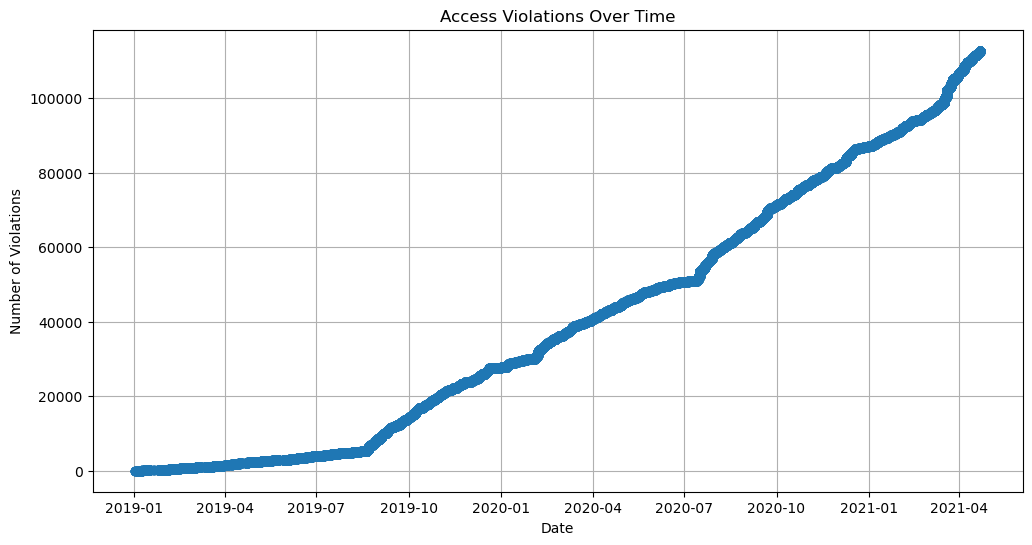

In [28]:

# Checks for evidence of students and alumni accessing both curriculums after January 1, 2019
# Set the date when access to both curriculums should have been shut off
shutdown_date = pd.Timestamp(datetime.date(2019, 1, 1))

# Filter records for program_id values 1 and 3, where access occurred after the shutdown date, and where cohort_id is not NaN
violations = df[(df.index > shutdown_date) & df['program_id'].isin([1, 3]) & ~df['cohort_id'].isna()]

# Check if there are any violations
if not violations.empty:
    # Create a plot of violations over time
    plt.figure(figsize=(12, 6))
    plt.plot(violations.index, range(len(violations)), marker='o')
    plt.title('Access Violations Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Violations')
    plt.grid()
    plt.show()
else:
    print("No violations found.")


In [ ]:
From 2019 Jan to April there were no violations

In [29]:
violations.head()

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,time
datetime,,,,,,,,,,,,
2019-01-01 12:20:53,/,51,13.0,72.179.161.39,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,12:20:53
2019-01-01 21:37:26,/,96,19.0,72.181.106.34,Quincy,#quincy,2017-06-05,2017-09-22,2017-06-05 20:12:10,2017-06-05 20:12:10,1.0,21:37:26
2019-01-02 02:55:20,/,51,13.0,72.179.161.39,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,02:55:20
2019-01-02 02:55:30,content/html-css,51,13.0,72.179.161.39,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,02:55:30
2019-01-02 02:56:01,content/html-css/css-i,51,13.0,72.179.161.39,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,02:56:01


In [30]:
# Filter the DataFrame for program_id 1
filtered_df_program1 = df[df['program_id'] == 1]

# Get unique paths for program_id 1
unique_paths_program1 = filtered_df_program1['path'].unique()
# Get nunique paths for program_id 1
unique_numberof_paths_program1 = filtered_df_program1['path'].nunique()

# Filter the DataFrame for program_id 3
filtered_df_program3 = df[df['program_id'] == 3]

# Get unique paths for program_id 3
unique_paths_program3 = filtered_df_program3['path'].unique()

# Get nunique paths for program_id 3
unique_numberof_paths_program3 = filtered_df_program3['path'].nunique()


In [31]:
# Checking for Violations Between Program ID 1 (Web Dev) and Program ID 3 (Data Science)

# Step 1: Reset the index
df = df.reset_index()

# Step 2: Create a column for program id 1 with a list of paths
df['program_id_1_paths'] = df[df['program_id'] == 1].groupby('cohort_id')['path'].transform(lambda x: x.tolist())

# Step 3: Create a column for program id 3 with a list of paths
df['program_id_3_paths'] = df[df['program_id'] == 3].groupby('cohort_id')['path'].transform(lambda x: x.tolist())

# Set the index back to 'datetime'
df = df.set_index('datetime')


# Step 4: Check for violations
violations_1_to_3 = df[(df['program_id'] == 1) & (df['path'].isin(df['program_id_3_paths'].explode()))]
violations_3_to_1 = df[(df['program_id'] == 3) & (df['path'].isin(df['program_id_1_paths'].explode()))]



# Get the number of violations
num_violations_1_to_3 = violations_1_to_3.shape[0]
num_violations_3_to_1 = violations_3_to_1.shape[0]

print("Number of Violations from web dev accessing ds:", num_violations_1_to_3)
print("Number of Violations from ds accessing web dev:", num_violations_3_to_1)


Number of Violations from web dev accessing ds: 9099
Number of Violations from ds accessing web dev: 23146


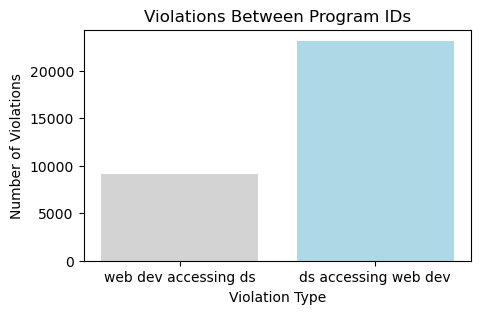

In [35]:
# After finding violations

# Create a bar plot to visualize the number of violations
plt.figure(figsize=(5, 3))
violations_counts = [len(violations_1_to_3), len(violations_3_to_1)]
violations_labels = ["web dev accessing ds", "ds accessing web dev"]

plt.bar(violations_labels, violations_counts, color=['lightgray', 'lightblue'])
plt.xlabel("Violation Type")
plt.ylabel("Number of Violations")
plt.title("Violations Between Program IDs")
plt.show()


<div style="background-color: rgba(255, 0, 0, 0.5);">
      <strong style="font-size: 18px;">  5. Take Away:-</strong>
 </div>
 
 At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? 
 
 - In 2019 both web dev and ds cohorts have accessed paths intended for the other program, which suggests a potential violation of the access restrictions.
 
   - Number of Violations from web dev accessing ds: 9099
   - Number of Violations from ds accessing web dev: 23146


Did it happen before?
 - From 2019 Jan to April there were no violations. The violations started happening after that.


# Deliver

Slide and email

# Conclusion:

In conclusion, the analysis highlights the need for enhanced security measures, and continuous monitoring to optimize the educational experience and ensure compliance with access policies at Codeup.

# Actionable Recommendations:

 - Implement real-time monitoring and alerting systems to detect and respond to suspicious activity promptly. 
 - Provide educational resources and guidelines to students and staff on responsible and secure access to the curriculum.    